# 分类算法（KNN算法和SVM支持向量机）

## KNN算法

### 一、读取数据集

In [9]:
import numpy as np
def file2matrix(filename):  
    fr = open(filename)  
    numberOfLines = len(fr.readlines())      
    returnMat = np.zeros((numberOfLines,3))        
    classLabelVector = []                       
    fr = open(filename)  
    index = 0 
    for line in fr.readlines():
        line = line.strip()  
        listFromLine = line.split('\t')   
        returnMat[index,:] = listFromLine[0:3]  
        if listFromLine[-1] == 'didntLike':
            classLabelVector.append(1)
        elif listFromLine[-1] == 'smallDoses':
            classLabelVector.append(2)
        elif listFromLine[-1] == 'largeDoses':
            classLabelVector.append(3)
        index += 1
    return returnMat,classLabelVector

datingDataMat,datingLabels=file2matrix('datingTestSet.txt')
print(datingDataMat)
print(datingLabels)

[[4.0920000e+04 8.3269760e+00 9.5395200e-01]
 [1.4488000e+04 7.1534690e+00 1.6739040e+00]
 [2.6052000e+04 1.4418710e+00 8.0512400e-01]
 ...
 [2.6575000e+04 1.0650102e+01 8.6662700e-01]
 [4.8111000e+04 9.1345280e+00 7.2804500e-01]
 [4.3757000e+04 7.8826010e+00 1.3324460e+00]]
[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 1, 3, 1, 3, 1, 2, 1, 1, 2, 3, 3, 1, 2, 3, 3, 3, 1, 1, 1, 1, 2, 2, 1, 3, 2, 2, 2, 2, 3, 1, 2, 1, 2, 2, 2, 2, 2, 3, 2, 3, 1, 2, 3, 2, 2, 1, 3, 1, 1, 3, 3, 1, 2, 3, 1, 3, 1, 2, 2, 1, 1, 3, 3, 1, 2, 1, 3, 3, 2, 1, 1, 3, 1, 2, 3, 3, 2, 3, 3, 1, 2, 3, 2, 1, 3, 1, 2, 1, 1, 2, 3, 2, 3, 2, 3, 2, 1, 3, 3, 3, 1, 3, 2, 2, 3, 1, 3, 3, 3, 1, 3, 1, 1, 3, 3, 2, 3, 3, 1, 2, 3, 2, 2, 3, 3, 3, 1, 2, 2, 1, 1, 3, 2, 3, 3, 1, 2, 1, 3, 1, 2, 3, 2, 3, 1, 1, 1, 3, 2, 3, 1, 3, 2, 1, 3, 2, 2, 3, 2, 3, 2, 1, 1, 3, 1, 3, 2, 2, 2, 3, 2, 2, 1, 2, 2, 3, 1, 3, 3, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 1, 1, 1, 2, 3, 2, 1, 3, 1, 3, 2, 2, 3, 1, 3, 1, 1, 2, 1, 2, 2, 1, 

### 二、分析数据

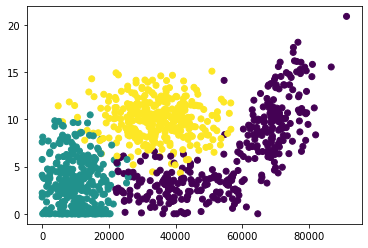

In [13]:
import numpy as np
import matplotlib.pyplot as plt
datingDataMat,datingLabels=file2matrix('datingTestSet.txt')
plt.scatter(datingDataMat[:,0],datingDataMat[:,1],c=datingLabels)
plt.show()

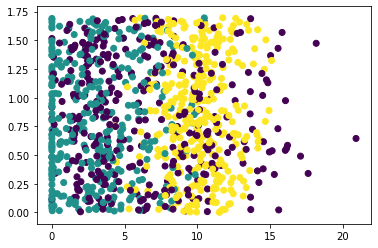

In [14]:
plt.scatter(datingDataMat[:,1],datingDataMat[:,2],c=datingLabels)
plt.show()

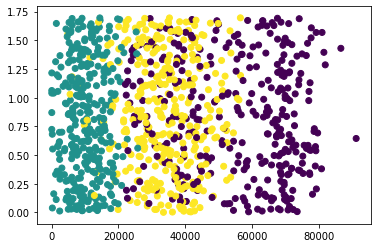

In [15]:
plt.scatter(datingDataMat[:,0],datingDataMat[:,2],c=datingLabels)
plt.show()

### 三、数据归一化处理

In [16]:
def autoNorm(dataSet):
    minVals = dataSet.min(0)  
    maxVals = dataSet.max(0)
    normDataSet = np.zeros(dataSet.shape)  
    normDataSet = (dataSet - minVals)/(maxVals - minVals)
    return normDataSet

In [17]:
dataSet=autoNorm(datingDataMat)
print(dataSet)

[[0.44832535 0.39805139 0.56233353]
 [0.15873259 0.34195467 0.98724416]
 [0.28542943 0.06892523 0.47449629]
 ...
 [0.29115949 0.50910294 0.51079493]
 [0.52711097 0.43665451 0.4290048 ]
 [0.47940793 0.3768091  0.78571804]]


### 四、封装KNN函数

In [23]:
import numpy as np

def knn(inX,dataSet,labels,k):
    dist=(((dataSet-inX)**2).sum(1))**0.5
    sortedDist=dist.argsort()
    classCount={}
    for i in range(k):
        voteLabel = labels[sortedDist[i]]
        classCount[voteLabel]=classCount.get(voteLabel,0)+1
    maxType=0
    maxCount=-1
    for key,value in classCount.items():
        if value > maxCount:
            maxType = key
            maxCount = value
    return maxType

### 五、测试KNN分类器模式

In [24]:
dataSet,labels=file2matrix('datingTestSet.txt')
normalSet=autoNorm(dataSet)
m=0.8
dataSize=normalSet.shape[0]
print('数据集总行数：',dataSize)
trainSize=int(m*dataSize)
testSize=int((1-m)*dataSize)
print(trainSize,testSize)

数据集总行数： 1000
800 199


In [27]:
k=5
results=[]
error=0
for i in range(testSize):
    results=knn(normalSet[trainSize+i-1,:],normalSet[0:trainSize,:],labels[0:trainSize],k)
    if(results!=labels[trainSize+i-1]):
        error=error+1
print('错误率：',error/testSize)

错误率： 0.05527638190954774


## 支持向量机算法

### 一、读取数据集

In [30]:
import numpy as np
import matplotlib.pyplot as plt
#导入svm库
from sklearn import svm

def file2matrix(filename):  
    fr = open(filename)  
    numberOfLines = len(fr.readlines())      
    returnMat = np.zeros((numberOfLines,3))        
    classLabelVector = []                       
    fr = open(filename)  
    index = 0 
    for line in fr.readlines():
        line = line.strip()  
        listFromLine = line.split('\t')   
        returnMat[index,:] = listFromLine[0:3]  
        if listFromLine[-1] == 'didntLike':
            classLabelVector.append(1)
        elif listFromLine[-1] == 'smallDoses':
            classLabelVector.append(2)
        elif listFromLine[-1] == 'largeDoses':
            classLabelVector.append(3)
        index += 1
    return returnMat,classLabelVector

datingDataMat,datingLabels=file2matrix('datingTestSet.txt')
print(datingDataMat)
print(datingLabels)

[[4.0920000e+04 8.3269760e+00 9.5395200e-01]
 [1.4488000e+04 7.1534690e+00 1.6739040e+00]
 [2.6052000e+04 1.4418710e+00 8.0512400e-01]
 ...
 [2.6575000e+04 1.0650102e+01 8.6662700e-01]
 [4.8111000e+04 9.1345280e+00 7.2804500e-01]
 [4.3757000e+04 7.8826010e+00 1.3324460e+00]]
[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 1, 3, 1, 3, 1, 2, 1, 1, 2, 3, 3, 1, 2, 3, 3, 3, 1, 1, 1, 1, 2, 2, 1, 3, 2, 2, 2, 2, 3, 1, 2, 1, 2, 2, 2, 2, 2, 3, 2, 3, 1, 2, 3, 2, 2, 1, 3, 1, 1, 3, 3, 1, 2, 3, 1, 3, 1, 2, 2, 1, 1, 3, 3, 1, 2, 1, 3, 3, 2, 1, 1, 3, 1, 2, 3, 3, 2, 3, 3, 1, 2, 3, 2, 1, 3, 1, 2, 1, 1, 2, 3, 2, 3, 2, 3, 2, 1, 3, 3, 3, 1, 3, 2, 2, 3, 1, 3, 3, 3, 1, 3, 1, 1, 3, 3, 2, 3, 3, 1, 2, 3, 2, 2, 3, 3, 3, 1, 2, 2, 1, 1, 3, 2, 3, 3, 1, 2, 1, 3, 1, 2, 3, 2, 3, 1, 1, 1, 3, 2, 3, 1, 3, 2, 1, 3, 2, 2, 3, 2, 3, 2, 1, 1, 3, 1, 3, 2, 2, 2, 3, 2, 2, 1, 2, 2, 3, 1, 3, 3, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 1, 1, 1, 2, 3, 2, 1, 3, 1, 3, 2, 2, 3, 1, 3, 1, 1, 2, 1, 2, 2, 1, 

### 二、数据归一化处理

In [31]:
def autoNorm(dataSet):
    minVals = dataSet.min(0)  
    maxVals = dataSet.max(0)
    normDataSet = np.zeros(dataSet.shape)  
    normDataSet = (dataSet - minVals)/(maxVals - minVals)
    return normDataSet

dataSet=autoNorm(datingDataMat)
print(dataSet)

[[0.44832535 0.39805139 0.56233353]
 [0.15873259 0.34195467 0.98724416]
 [0.28542943 0.06892523 0.47449629]
 ...
 [0.29115949 0.50910294 0.51079493]
 [0.52711097 0.43665451 0.4290048 ]
 [0.47940793 0.3768091  0.78571804]]


### 三、测试分类器模式

In [32]:
m=0.8
dataSize=dataSet.shape[0]
print(dataSize)
trainSize=int(m*dataSize)
testSize=int((1-m)*dataSize)
print(trainSize,testSize)

1000
800 199


### 四、封装SVM函数

In [33]:
model=svm.SVC()
model.fit(dataSet[0:trainSize,:],datingLabels[0:trainSize]) 

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### 五、数据分析

In [35]:
error=0
for i in range(testSize):
    result=model.predict(dataSet[trainSize+i-1,:].reshape(1,-1))
    if result!=datingLabels[trainSize+i-1]:
        error=error+1
print("error:",error/testSize)

error: 0.07537688442211055


# 回归算法（）

## 回归分析与相关分析

In [38]:
import numpy as np
import pandas as pd

income=[20,40,20,30,10,10,20,20,20,30]
production=[30,60,40,60,30,40,40,50,30,70]

df=pd.DataFrame({'income':np.array(income),'production':np.array(production)})
print(df)
print('相关系数表格：')
print(df.corr())

   income  production
0      20          30
1      40          60
2      20          40
3      30          60
4      10          30
5      10          40
6      20          40
7      20          50
8      20          30
9      30          70
相关系数表格：
              income  production
income      1.000000    0.759014
production  0.759014    1.000000


## 一元线性回归

In [48]:
import numpy as np
from sklearn import linear_model

income=[20,40,20,30,10,10,20,20,20,30]
production=[30,60,40,60,30,40,40,50,30,70]

Income=np.array(income).reshape(-1,1)
Production=np.array(production).reshape(-1,1)

lr=linear_model.LinearRegression()
lr.fit(Income,Production)
print(lr.coef_)
print(lr.intercept_)

test=np.array([15]).reshape(1,1)
print('当投入为15时，产出为：',lr.predict(test))

[[1.18421053]]
[18.94736842]
当投入为15时，产出为： [[36.71052632]]


## 回归分析与相关分析

In [40]:
import numpy as np
import pandas as pd

A=[250,360,165,43,92,200,355,290,230,120,73,205,400,320,72,272,94,190,235,139]
B=[35,29,36,60,65,30,10,70,21,55,54,48,20,39,60,20,58,40,27,30]
C=[3,4,7,6,5,5,6,10,9,2,12,5,5,4,8,5,7,8,9,7]
D=[6,10,3,9,6,5,7,10,11,5,4,1,15,7,6,8,3,11,8,5]

df=pd.DataFrame({'取暖费':np.array(A),'温度':np.array(B),'厚度':np.array(C),'年数':np.array(D)})
print(df)
print(df.corr())
print(df.corr()[u'温度'])
print(df[u'取暖费'].corr(df[u'温度']))

    取暖费  温度  厚度  年数
0   250  35   3   6
1   360  29   4  10
2   165  36   7   3
3    43  60   6   9
4    92  65   5   6
5   200  30   5   5
6   355  10   6   7
7   290  70  10  10
8   230  21   9  11
9   120  55   2   5
10   73  54  12   4
11  205  48   5   1
12  400  20   5  15
13  320  39   4   7
14   72  60   8   6
15  272  20   5   8
16   94  58   7   3
17  190  40   8  11
18  235  27   9   8
19  139  30   7   5
          取暖费        温度        厚度        年数
取暖费  1.000000 -0.661027 -0.257101  0.536728
温度  -0.661027  1.000000  0.178191 -0.315893
厚度  -0.257101  0.178191  1.000000  0.063617
年数   0.536728 -0.315893  0.063617  1.000000
取暖费   -0.661027
温度     1.000000
厚度     0.178191
年数    -0.315893
Name: 温度, dtype: float64
-0.6610265353019105


## 多元线性回归

In [41]:
import numpy as np
from sklearn import linear_model

A=[250,360,165,43,92,200,355,290,230,120,73,205,400,320,72,272,94,190,235,139]
B=[35,29,36,60,65,30,10,70,21,55,54,48,20,39,60,20,58,40,27,30]
C=[3,4,7,6,5,5,6,10,9,2,12,5,5,4,8,5,7,8,9,7]
D=[6,10,3,9,6,5,7,10,11,5,4,1,15,7,6,8,3,11,8,5]

x=np.array([B,C,D]).T
y=np.array(A).reshape(-1,1)
lr=linear_model.LinearRegression()
lr.fit(x,y)
print(lr.coef_)
print(lr.intercept_)
test=np.array([30,5,10]).reshape(1,3)
print('取暖费为：',lr.predict(test))

[[-3.07146912 -8.21319349 12.35500321]]
[294.85253534]
取暖费为： [[285.19252626]]


# 聚类算法

## K-Means

### 一、读取数据

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

fr = open('testSet.txt')
numberOfLines = len(fr.readlines()) 
fr.close();
print(numberOfLines)

dataset= np.zeros((numberOfLines,2)) 
fr = open('testSet.txt')
index = 0
for line in fr.readlines():
    listFromLine = line.split('\t') #用tab键分割
    dataset[index,0] = listFromLine[0]
    dataset[index,1] = listFromLine[1]
    index += 1
fr.close();

print(dataset)

80
[[ 1.658985  4.285136]
 [-3.453687  3.424321]
 [ 4.838138 -1.151539]
 [-5.379713 -3.362104]
 [ 0.972564  2.924086]
 [-3.567919  1.531611]
 [ 0.450614 -3.302219]
 [-3.487105 -1.724432]
 [ 2.668759  1.594842]
 [-3.156485  3.191137]
 [ 3.165506 -3.999838]
 [-2.786837 -3.099354]
 [ 4.208187  2.984927]
 [-2.123337  2.943366]
 [ 0.704199 -0.479481]
 [-0.39237  -3.963704]
 [ 2.831667  1.574018]
 [-0.790153  3.343144]
 [ 2.943496 -3.357075]
 [-3.195883 -2.283926]
 [ 2.336445  2.875106]
 [-1.786345  2.554248]
 [ 2.190101 -1.90602 ]
 [-3.403367 -2.778288]
 [ 1.778124  3.880832]
 [-1.688346  2.230267]
 [ 2.592976 -2.054368]
 [-4.007257 -3.207066]
 [ 2.257734  3.387564]
 [-2.679011  0.785119]
 [ 0.939512 -4.023563]
 [-3.674424 -2.261084]
 [ 2.046259  2.735279]
 [-3.18947   1.780269]
 [ 4.372646 -0.822248]
 [-2.579316 -3.497576]
 [ 1.889034  5.1904  ]
 [-0.798747  2.185588]
 [ 2.83652  -2.658556]
 [-3.837877 -3.253815]
 [ 2.096701  3.886007]
 [-2.709034  2.923887]
 [ 3.367037 -3.184789]
 [-2.121

### 二、画图

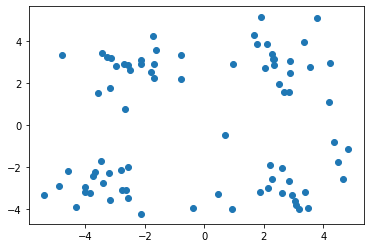

In [52]:
plt.scatter(dataset[:,0],dataset[:,1])

### 三、定义K-Means模型

[[ 2.54391447  3.21299611]
 [ 2.19454347 -3.07604306]
 [-3.53973889 -2.89384326]
 [-2.46154315  2.78737555]
 [ 4.5110462  -1.0349174 ]]


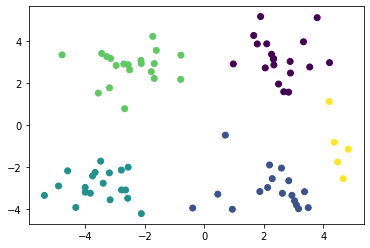

In [53]:
model=KMeans(n_clusters=5)
model.fit(dataset)
print(model.cluster_centers_)
plt.scatter(dataset[:,0],dataset[:,1],c=model.labels_)

## 主成分分析

In [56]:
import numpy as np
from sklearn.decomposition import PCA

X=np.array([[-1,-1],
            [-2,-1],
            [-3,-2],
            [1,1],
            [2,1],
            [3,2]])

pca=PCA(2)
pca.fit(X)
print(pca.components_)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
newX=pca.transform(X)
print(newX)

[[-0.83849224 -0.54491354]
 [ 0.54491354 -0.83849224]]
[7.93954312 0.06045688]
[0.99244289 0.00755711]
[[ 1.38340578  0.2935787 ]
 [ 2.22189802 -0.25133484]
 [ 3.6053038   0.04224385]
 [-1.38340578 -0.2935787 ]
 [-2.22189802  0.25133484]
 [-3.6053038  -0.04224385]]
